# Business Understanding

The business objectives for this project could be to provide Students, youth and other mobile phone carriers with a enticing,interesting, fun and engaging platform to stay fit, track their sleep, writing notes, managing tasks etc. 
The app could aim to enhance the user experience through attractive features such as sleep score, accurate calories burnt , exercises or sports as per activeness, and other features. The end game of our project is to give user an application that can do task management, help user to ecourage habbits like daily-diary writing taking e-notes, keep user fit by giving them exercise per calorie burnt amount and show exercise as per user activeness.

# Data Understanding

The data sources is used for denoting the Calories Burned During Exercise and Activities of four general weight catoegories included underweighted(130lb), fit(155lb), average-weighted(180lb) and over-weighted(205lbs).
We have collected theese ov=pen-sourced datasets from Kaggle. The
attributes in the data includes list of all possible acities exercies and sports,calorie burnt as per stated 4 weight categories, the activeness of exercises and workouts, and any other relevant information related to the calorie burnt. The data
types of the attributes are categorical (e.g. Activity_Exercise_Sport_(1 hour)), numerical (e.g. 130 lb
, 155 lb, 180lb, 205lbs). Exploring the data using visualization
techniques can help to identify any patterns or relationships that might exist between the different attributes.
For example, you could look at the relationship between calorie burnt per exercise of an underweighted guy(130lb) and averge-weighted guy(180lb). We verified the data quality by performing various data
cleaning and transformation steps during the data Understanding phase to ensure that the data is suitable
for analysis including handling missing values, removing duplicates, and transforming the data into a format
that is suitable for analysis.

# Data-preprocessing and Data-cleaning

In [2]:
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
df_calorie = pd.read_csv("exercise_dataset.csv")
df_calorie.head(249)

,Activity_Exercise_Sport_(1 hour),130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825
...,...,...,...,...,...,...
243,General cleaning,207,246,286,326,0.721008
244,"Cleaning, dusting",148,176,204,233,0.515199
245,Taking out trash,177,211,245,279,0.617427
246,"Walking, pushing a wheelchair",236,281,327,372,0.823236


In [14]:
#change column name
df_calorie.rename(columns = {'Activity_Exercise_Sport_(1 hour)': 'Exercise', 'Calories per kg':'Calorieskg'
                    ,'130 lb':'lb130','155 lb':'lb155','180 lb':'lb180','205 lb':'lb205'}, inplace = True)

In [15]:
df_calorie.columns


Index(['Exercise', 'lb130', 'lb155', 'lb180', 'lb205', 'Calorieskg'], dtype='object')

In [16]:
df_calorie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Exercise    248 non-null    object 
 1   lb130       248 non-null    int64  
 2   lb155       248 non-null    int64  
 3   lb180       248 non-null    int64  
 4   lb205       248 non-null    int64  
 5   Calorieskg  248 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 11.8+ KB


In [17]:
missing_data = pd.DataFrame({'total_missing': df_calorie.isnull().sum(), 'perc_missing': (df_calorie.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
Exercise,0,0.0
lb130,0,0.0
lb155,0,0.0
lb180,0,0.0
lb205,0,0.0
Calorieskg,0,0.0


In [18]:
df_calorie.describe()

,lb130,lb155,lb180,lb205,Calorieskg
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,389.754032,464.689516,539.685484,614.620968,1.359930
std,194.434028,232.019135,269.430029,306.847470,0.678851
min,89.000000,106.000000,123.000000,140.000000,0.310067
25%,236.000000,281.000000,327.000000,372.000000,0.823236
50%,354.000000,422.000000,490.000000,558.000000,1.234853
75%,472.000000,563.000000,654.000000,745.000000,1.647825
max,1062.000000,1267.000000,1471.000000,1675.000000,3.706591


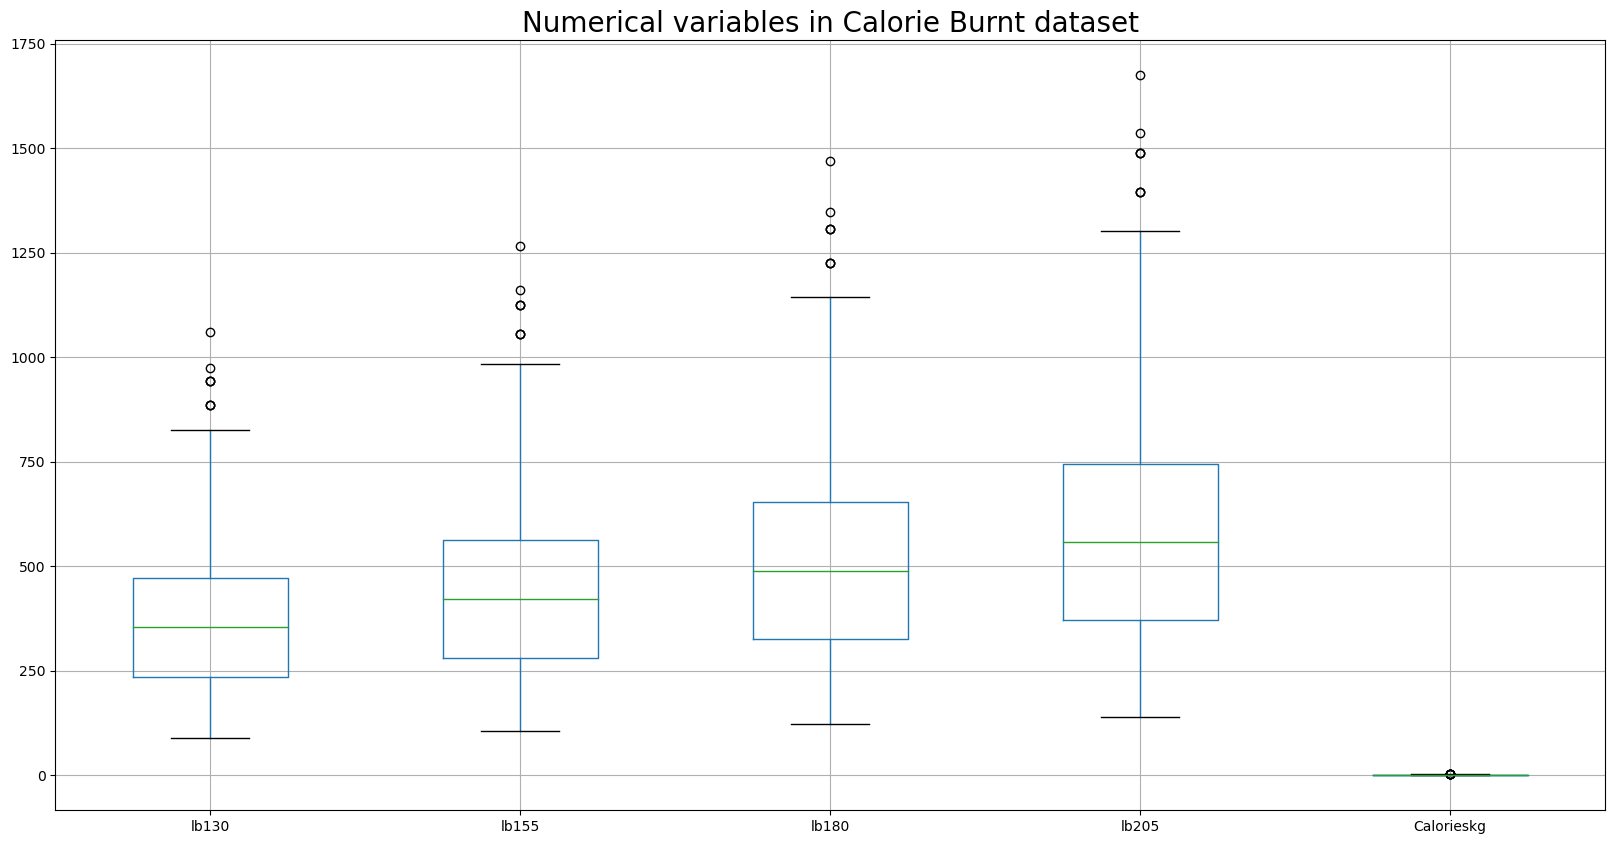

In [19]:
num_cols = ['Exercise', 'lb130', 'lb155', 'lb180','lb205', 'Calorieskg']
plt.figure(figsize=(20,10))
df_calorie[num_cols].boxplot()
plt.title("Numerical variables in Calorie Burnt dataset", fontsize=20)
plt.show()

In [20]:
df_calorie.sort_values(by=['Calorieskg'], ascending=True).head(10)

,Exercise,lb130,lb155,lb180,lb205,Calorieskg
238,Watering lawn or garden,89,106,123,140,0.310067
166,"Walking, under 2.0 mph, very slow",118,141,163,186,0.411618
167,"Walking 2.0 mph, slow",148,176,204,233,0.515199
70,Croquet,148,176,204,233,0.515199
63,Billiards,148,176,204,233,0.515199
95,"Horseback riding, walking",148,176,204,233,0.515199
157,Bird watching,148,176,204,233,0.515199
160,Pushing stroller or walking with children,148,176,204,233,0.515199
76,"Football or baseball, playing catch",148,176,204,233,0.515199
31,Mild stretching,148,176,204,233,0.515199


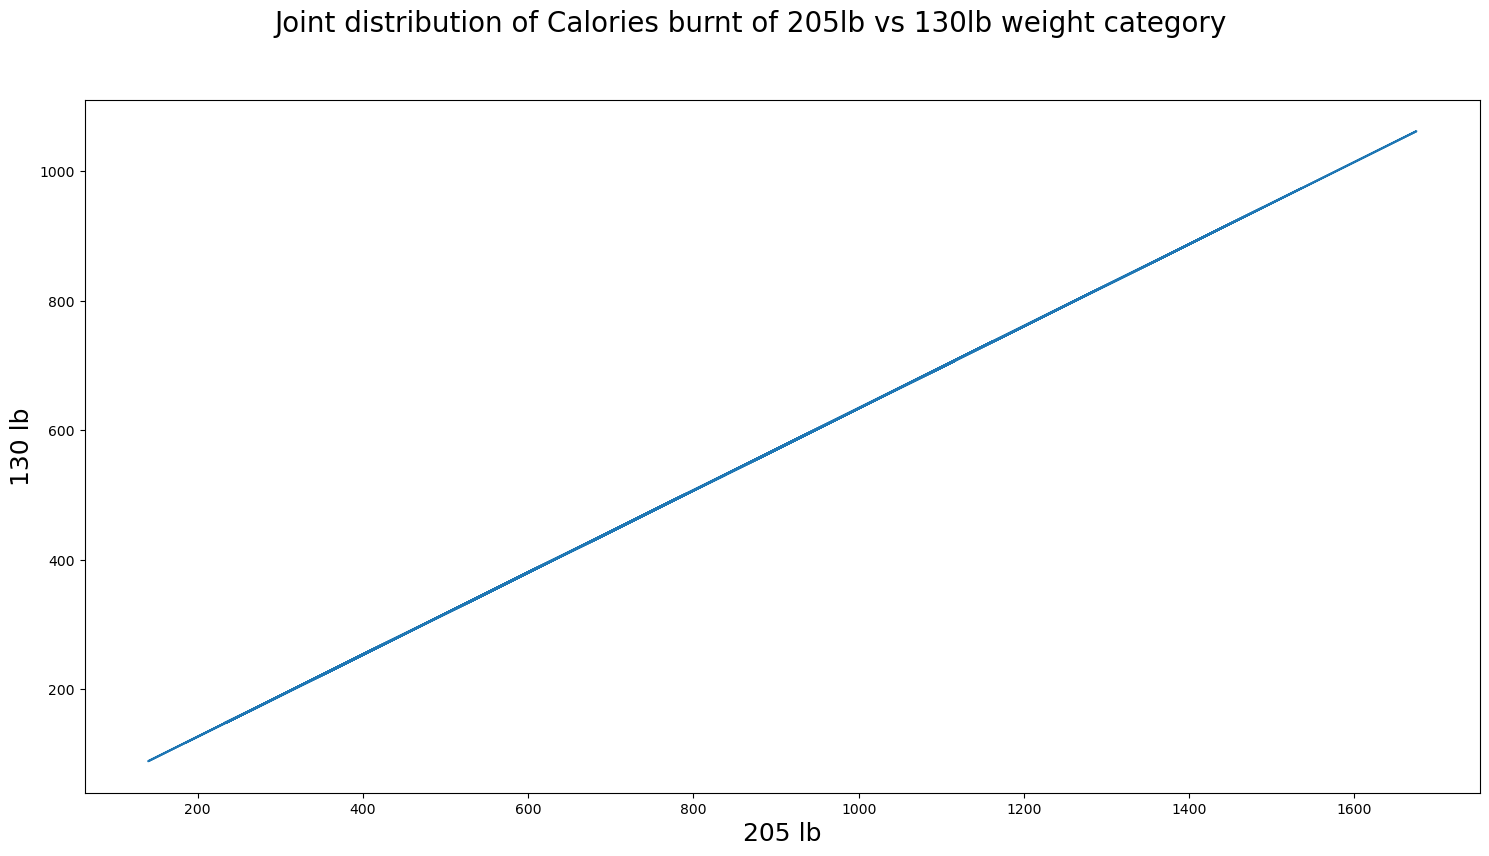

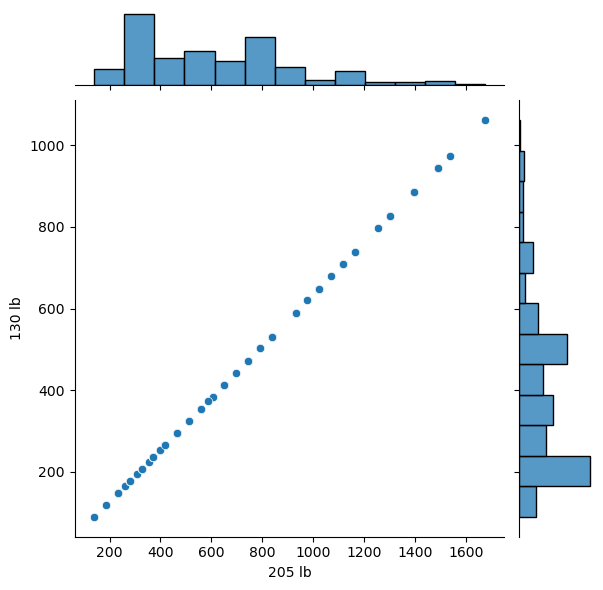

In [9]:
plt.figure(figsize=(18,9))
plt.ylabel('130 lb', fontsize=18)
plt.xlabel('205 lb', fontsize=18)
plt.suptitle("Joint distribution of Calories burnt of 205lb vs 130lb weight category  ", fontsize= 20)
plt.plot(df_calorie['205 lb'], df_calorie['130 lb'] )
sns.jointplot(df_calorie['205 lb'], df_calorie['130 lb'] )
plt.show()


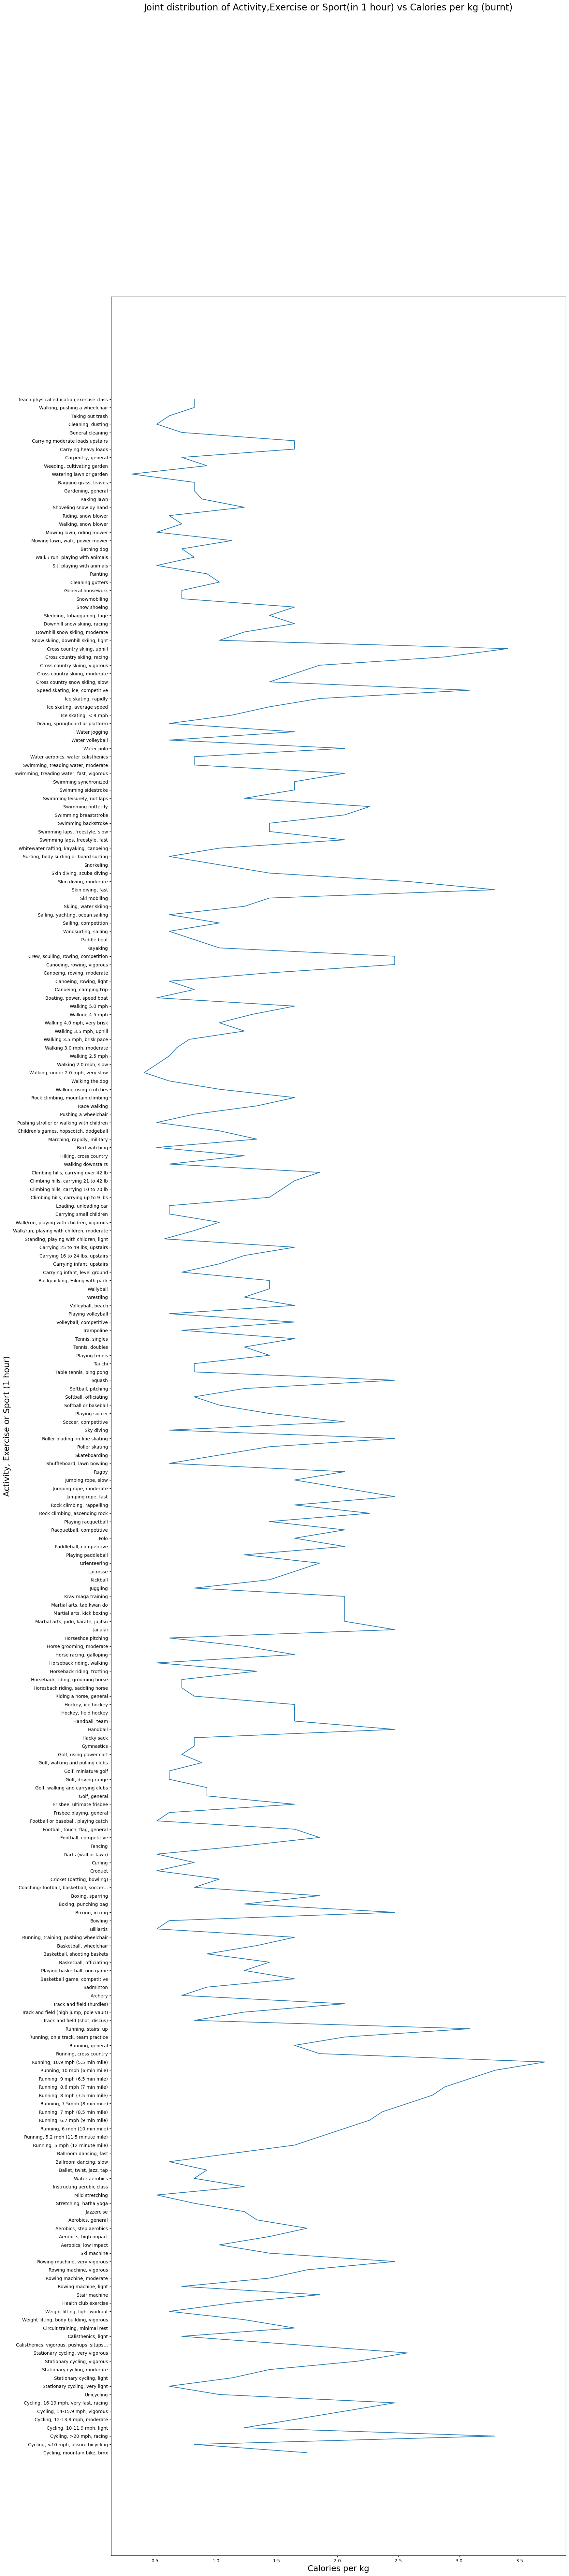

In [21]:
plt.figure(figsize=(18,90))
plt.ylabel('Activity, Exercise or Sport (1 hour)', fontsize=18)
plt.xlabel('Calories per kg', fontsize=18)
plt.suptitle("Joint distribution of Activity,Exercise or Sport(in 1 hour) vs Calories per kg (burnt)  ", fontsize= 20)
plt.plot(df_calorie['Calorieskg'], df_calorie['Exercise'] )
plt.show()



# Data preparation / manuplation

The first step that we have to do is to split the Exercise column with comma as the separator, and figure out the unique exercise listed

In [22]:
sep = df_calorie['Exercise'].str.split(',')
unique_exercises = []
for i in range(0,len(sep)):
    if sep[i][0] not in unique_exercises:
        unique_exercises.append(sep[i][0])
print(f"There are {len(unique_exercises)} unique exercises in this data set")

There are 167 unique exercises in this data set


The next step in our task is to calculate the mean number of calories burned for each unique exercise listed in the Exercise column. In addition to this, we also need to determine the frequency at which each unique exercise appears in the Exercise column. 

In [25]:
calories_burned = {}
for exercise in unique_exercises:
    for key,i in enumerate(df_calorie['Exercise']):
        if exercise not in calories_burned:
            calories_burned[exercise] = 0
        if exercise in i:
            calories_burned[exercise] += df_calorie['Calorieskg'][key]
            #figure out how to get mean of calorieskg per exercise
exercise_num_occurrence = {}
for exercise in unique_exercises:
    for key,i in enumerate(df_calorie['Exercise']):
        if exercise not in exercise_num_occurrence:
            exercise_num_occurrence[exercise] = 0
        if exercise in i:
            exercise_num_occurrence[exercise] += 1

# get mean value of of calories burned of each unique exercises
for i in unique_exercises:
    calories_burned[i] = calories_burned[i]/exercise_num_occurrence[i]

Now we can convert them into pandas dataframes. Once we have done this, we can merge the two dataframes together using pandas' merge function. This will allow us to combine the information from the calories_burned and exercise_num_occurrence dictionaries into a single dataframe for further analysis

In [26]:
occurrence_df = pd.DataFrame(exercise_num_occurrence.items(), columns = ['Unique_exercise','Num_occurrence'])
unique_df = pd.DataFrame(calories_burned.items(), columns = ['Unique_exercise','Mean_calories_per_kg'])

#combine dataset
df1 = unique_df.merge(occurrence_df, on = "Unique_exercise")

The next step in our process is to use SQLAlchemy to convert the data from its current csv format into a sqlite database.

In [27]:
engine_df1 = create_engine('sqlite://', echo = False)
df1.to_sql('Exercise_Data', con = engine_df1)

167

In [28]:
unique_keywords = []
for i in range(0,len(sep)):
    if (sep[i][-1] in unique_exercises):
        pass
    elif sep[i][-1] not in unique_keywords:
        unique_keywords.append(sep[i][-1])
    
    if (len(sep[i]) > 2) and (sep[i][-2] in unique_exercises):
        pass
    elif (len(sep[i]) > 2) and sep[i][-2] not in unique_keywords:
        unique_keywords.append(sep[i][-2])
print(f"There are {len(unique_keywords)} unique keywords in this data set, excluding the exercise name")

There are 142 unique keywords in this data set, excluding the exercise name


Our next step is to create a list of these keywords that appear in the Exercise column. Once we have compiled this list of keywords, we can use it to more accurately categorize and analyze the exercises listed in the column. This will provide us with a clearer understanding of the types of activities being performed and how they may be impacting the overall health and fitness of the individuals in the dataset.

In [30]:
frequency = {}
for keyword in unique_keywords:
    for key,i in enumerate(df_calorie['Exercise']):
        if keyword not in frequency:
                frequency[keyword] = 1
        elif keyword in i:
                frequency[keyword] += 1
check_error = [ans for ans in unique_exercises if ans in unique_keywords]
print(f"repeated keywords: {len(check_error)}.")

repeated keywords: 0.


In [31]:
#figure out how to get mean of calorieskg per keyword
keyword_calburned = {}
for keyword in unique_keywords:
    for key,i in enumerate(df_calorie['Exercise']):
        if keyword not in keyword_calburned:
            keyword_calburned[keyword] = 0
        if keyword in i:
            keyword_calburned[keyword] += df_calorie["Calorieskg"][key]
# get mean value of of calories burned of each unique keywords
for i in unique_keywords:
    keyword_calburned[i] = keyword_calburned[i]/frequency[i]

In the final step for the exercise type and intensity section, we will create two dataframes: one for the frequency dictionary and one for the keyword_calburned dictionary. Then, we will merge these two dataframes into a single dataframe.

In [32]:
frequency_df = pd.DataFrame(frequency.items(), columns = ['Keyword','Frequency'])
keyword_occ_df = pd.DataFrame(keyword_calburned.items(), columns = ['Keyword','Mean_calburned'])

df2 = frequency_df.merge(keyword_occ_df, on = "Keyword")

In [33]:
df2.sort_values(by = 'Frequency', ascending = False).head(10)

,Keyword,Frequency,Mean_calburned
8,moderate,14,1.335533
10,vigorous,12,1.776174
6,light,10,0.726830
23,general,9,0.949610
43,up,9,1.635940
47,competitive,8,1.802013
27,slow,7,0.867821
28,fast,7,1.926944
134,walk,7,0.759210
74,walking,6,0.696975


In [35]:
# find the meaning of the keyword up
for i in df_calorie['Exercise']:
    if 'up' in i:
        print(i)

Calisthenics, vigorous, pushups, situps…
Running, stairs, up
Carrying infant, upstairs
Carrying 16 to 24 lbs, upstairs
Carrying 25 to 49 lbs, upstairs
Climbing hills, carrying up to 9 lbs
Walking 3.5 mph, uphill
Cross country skiing, uphill
Carrying moderate loads upstairs


In [36]:
#combine walk and walking
frequency_df.loc[134,'Frequency'] += frequency_df.loc[74,'Frequency']

In [37]:
engine_df2 = create_engine('sqlite://', echo = False)
df2.to_sql('Frequency_Data', con = engine_df2)

142

# Visualisation

In [38]:
pd.read_sql_query('''SELECT Unique_exercise, Mean_calories_per_kg, Num_occurrence 
                     FROM Exercise_Data LIMIT 5''', engine_df1)

,Unique_exercise,Mean_calories_per_kg,Num_occurrence
0,Cycling,1.897446,7
1,Unicycling,1.029722,1
2,Stationary cycling,1.585676,5
3,Calisthenics,1.184417,2
4,Circuit training,1.647825,1


In [39]:
pd.read_sql_query('''SELECT Unique_exercise, Mean_calories_per_kg, Num_occurrence FROM Exercise_Data 
                     ORDER BY Num_occurrence DESC, Mean_calories_per_kg DESC LIMIT 10''', engine_df1)

,Unique_exercise,Mean_calories_per_kg,Num_occurrence
0,Running,2.426167,16
1,Walking,0.858923,14
2,Swimming,1.668000,10
3,Cycling,1.897446,7
4,Golf,0.782728,6
5,Stationary cycling,1.585676,5
6,Cross country skiing,2.445335,4
7,Climbing hills,1.621761,4
8,Rowing machine,1.596035,4
9,Aerobics,1.390056,4


Text(0, 0.5, '')

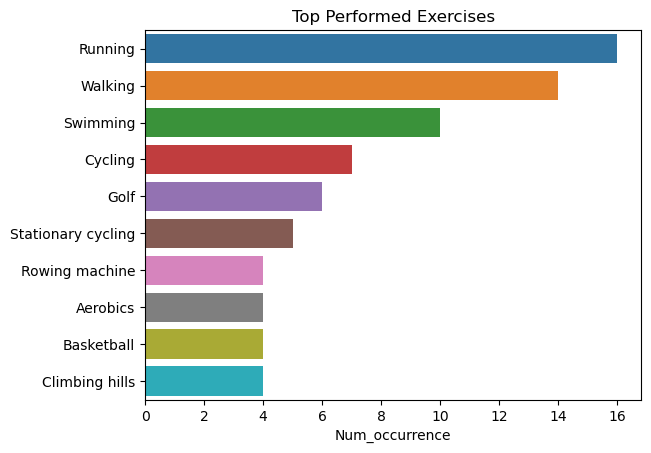

In [40]:
#top ten by  occurrence
top_five_cal = pd.read_sql_query('''SELECT Unique_exercise, Mean_calories_per_kg, Num_occurrence FROM Exercise_Data 
                                ORDER BY Num_occurrence DESC LIMIT 10''', engine_df1)
sns.barplot(y = 'Unique_exercise', x = 'Num_occurrence', dodge = False, data = top_five_cal)
plt.title("Top Performed Exercises")
plt.ylabel(None)


Text(0, 0.5, '')

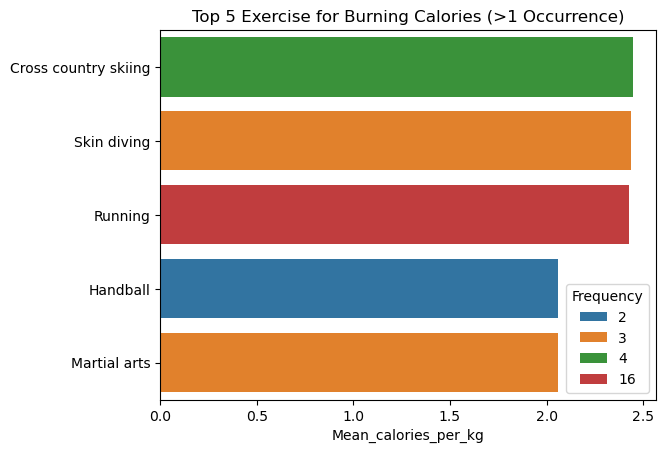

In [41]:
#top ten purely by calories burned per kg
top_five_purecal = pd.read_sql_query('''SELECT Unique_exercise, Mean_calories_per_kg, Num_occurrence 
                                        FROM Exercise_Data WHERE Num_occurrence > 1 
                                        ORDER BY Mean_calories_per_kg DESC LIMIT 5''', engine_df1)
sns.barplot(y = 'Unique_exercise', x = 'Mean_calories_per_kg', hue = 'Num_occurrence', dodge = False, data = top_five_purecal)
plt.title("Top 5 Exercise for Burning Calories (>1 Occurrence)")
plt.legend(title="Frequency")
plt.ylabel(None)

Text(0, 0.5, '')

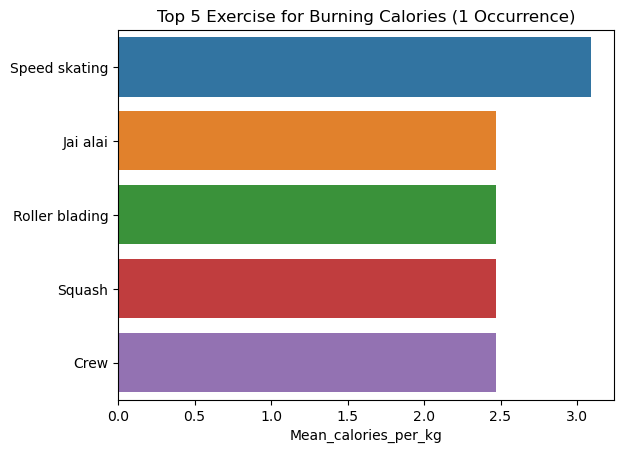

In [42]:
# check top 5 of only one occurrence in exercise
top_five_one_occurrence = pd.read_sql_query('''SELECT Unique_exercise, Mean_calories_per_kg, Num_occurrence 
                                               FROM Exercise_Data WHERE Num_occurrence = 1 
                                               ORDER BY Mean_calories_per_kg DESC LIMIT 5''', engine_df1)
sns.barplot(y = 'Unique_exercise', x = 'Mean_calories_per_kg', data = top_five_one_occurrence)
plt.title("Top 5 Exercise for Burning Calories (1 Occurrence)")
plt.ylabel(None)

In [43]:
top10_freq = pd.read_sql_query('''SELECT * FROM Frequency_Data ORDER BY Frequency DESC LIMIT 10''', engine_df2)
top10_freq

,index,Keyword,Frequency,Mean_calburned
0,8,moderate,14,1.335533
1,10,vigorous,12,1.776174
2,6,light,10,0.726830
3,23,general,9,0.949610
4,43,up,9,1.635940
5,47,competitive,8,1.802013
6,27,slow,7,0.867821
7,28,fast,7,1.926944
8,134,walk,7,0.759210
9,4,racing,6,1.990727


In [44]:
top10_calburned = pd.read_sql_query('''SELECT * FROM Frequency_Data ORDER BY Mean_calburned DESC LIMIT 10''', engine_df2)
top10_calburned

,index,Keyword,Frequency,Mean_calburned
0,4,racing,6,1.990727
1,28,fast,7,1.926944
2,39,10.9 mph (5.5 min mile),2,1.853296
3,47,competitive,8,1.802013
4,10,vigorous,12,1.776174
5,0,bmx,1,1.750730
6,1,mountain bike,1,1.750730
7,14,very vigorous,3,1.681901
8,5,>20 mph,2,1.647487
9,38,10 mph (6 min mile),2,1.647487


<AxesSubplot:xlabel='Mean_calburned', ylabel='Keyword'>

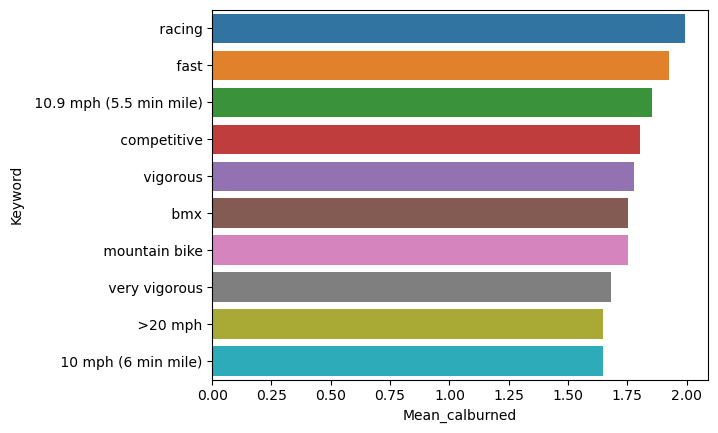

In [45]:
sns.barplot(x = 'Mean_calburned', y = 'Keyword', data = top10_calburned)

# Conclusion

Based on the data analyzed, it can be concluded that:

1. Cardiovascular exercises, such as running and walking, are among the most frequently performed exercises due to their efficiency in achieving physical fitness and burning calories.
2. Despite being simple, running and walking are effective at burning calories.
3. Moderate intensity exercises are the most popular among people seeking to improve their physical fitness.
4. To maximize calorie-burning potential, it is advisable to engage in vigorous and heart-pumping exercises.